lamda: 8
k: 15
0.991768989013


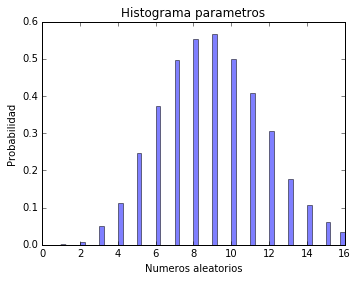

In [24]:
%matplotlib inline 
import matplotlib.pyplot as plt
import math
import numpy as np

semilla = 9

def  congruencial(x0):
    a = 1664525
    b = 1013904223
    m = 2**32
    xi = x0
    ui =0
    xi = (a*xi + b)%(m)
    ui = float(xi)/float(m)

    return xi,ui

        
def  poisson(lamda,k):
    poisson = []
    for i in range(k+1):
        a = (math.exp(-lamda)*lamda**i)
        fac = factorial(i)        
        poisson.append(a/fac)
    return poisson

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def acumulada(dis):
    pxacum = []
    for x in range(len(dis)):
        if(x == 0):
            pxacum.append(dis[x])
        else:
            suma = pxacum[x-1]+dis[x]
            pxacum.append(suma)
        
    return pxacum

def inversion(acum,semilla,itera):
    inver = []
    xi = semilla
    for i in range(itera):
        xi,random = congruencial(xi)
        #print('iteracion : ')
        #print(random)
        for x in range(len(acum)):
            if(random <=acum[x]):
                #print(x+1)
                inver.append(x+1) 
                break
    return inver

lamda =int(input("lamda: "))
k =int(input("k: "))

fx=poisson(lamda,k)

print(np.sum(fx))
pxacum = acumulada(fx)

inversi = inversion(pxacum,semilla,5000)

num_bins = 60
n, bins, patches = plt.hist(inversi, num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('Numeros aleatorios')
plt.ylabel('Probabilidad')
plt.title('Histograma parametros')

plt.subplots_adjust(left=0.2)
plt.show()